In [66]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA

import torch
import torchvision.datasets as datasets
import torchvision.transforms as transforms

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# Provided resources

## Download & untar resource in current directory

In [67]:
%cd /content/drive/MyDrive/Colab\ Notebooks/

/content/drive/MyDrive/Colab Notebooks


In [68]:
# !tar xvzf resource.tar.gz

## 1. Pre-trained VAE

In [69]:
vae = torch.load('vae.pt')['vae']
help(vae.encode), help(vae.decode)

Help on method encode in module vae:

encode(input: ~torch.tensor) method of vae.VAE instance
    Encodes the input by passing through the encoder network
    and returns the latent codes.
    :param input: (Tensor) Input tensor to encoder [N x C x H x W]
    :return: (Tensor) List of latent codes

Help on method decode in module vae:

decode(z: ~torch.tensor) -> ~torch.tensor method of vae.VAE instance
    Maps the given latent codes
    onto the image space.
    :param z: (Tensor) [B x D]
    :return: (Tensor) [B x C x H x W]



(None, None)

In [87]:
vae

VAE(
  (encoder): Sequential(
    (0): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (1): Sequential(
      (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (2): Sequential(
      (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (3): Sequential(
      (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
      (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): LeakyReLU(negative_slope=0.01)
    )
    (4): Sequentia

## 2. Pre-trained GAN

In [70]:
gan = torch.load('gan.pt')['gan']
help(gan.decode)

Help on method decode in module gan:

decode(z: ~torch.tensor) -> ~torch.tensor method of gan.GAN instance
    Maps the given latent codes
    onto the image space.
    :param z: (Tensor) [B x D]
    :return: (Tensor) [B x C x H x W]



In [88]:
gan

GAN(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

## 3. TinyCelebA : first 999 images of full CelebA data

999

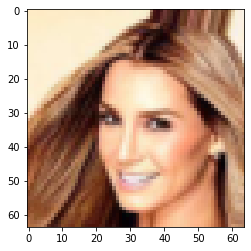

In [71]:
img_w = 64

dataset = datasets.ImageFolder(
    root='tiny_celeba',
    transform=transforms.Compose([
       transforms.Resize(img_w),
       transforms.CenterCrop(img_w),
       transforms.ToTensor(),
       transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
    ])
)
denormalize = transforms.Normalize((-1., -1., -1.), (2., 2., 2.))

x, _ = dataset[0]
plt.imshow(np.rollaxis(denormalize(x).numpy(), 0, 3))
len(dataset)

# Problem 1 : Generate facial images

## 1-1 : Generate 10 images from VAE
Visualize 10 images and report them with your code.

In [72]:
n_sample = 10
vae_latent_dim = vae.latent_dim

In [73]:
### your answer ###
zs = torch.randn(n_sample, vae_latent_dim)
xs = vae.decode(zs)
xs = denormalize(xs).squeeze().detach().cpu().numpy()

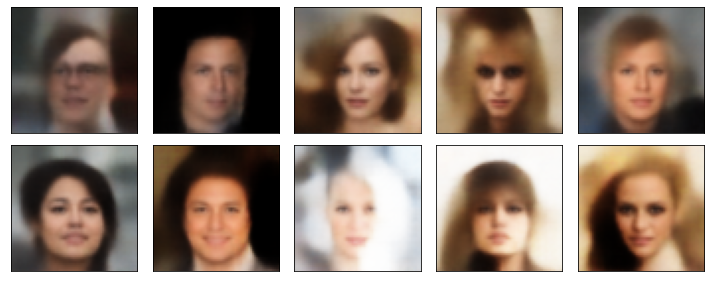

In [74]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i in range(10):
    ax = axes[i//5][i%5]
    x = xs[i]
    
    ax.imshow(np.rollaxis(x, 0, 3))

    ax.set_xticks([]);ax.set_yticks([])
    
fig.tight_layout()

## 1-2 : Generate 10 images from GAN
Visualize 10 images and report them with your code.

In [75]:
n_sample = 10
gan_latent_dim = 100

In [76]:
### your answer ###
zs = torch.randn(n_sample, gan_latent_dim)

xs = gan.decode(zs)
xs = denormalize(xs).squeeze().detach().cpu().numpy()
xs = np.rollaxis(xs, 1, 4)

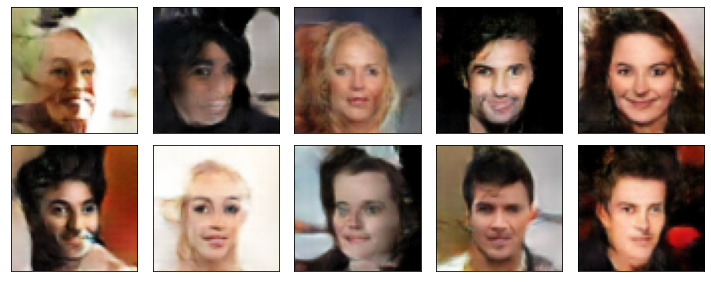

In [77]:
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i in range(10):
    ax = axes[i//5][i%5]
    x = xs[i]
    
    ax.imshow(x)
    ax.set_xticks([]);ax.set_yticks([])
    
fig.tight_layout()

# Problem 2 : Visualize latent space

## 2-1 : Visualize latent space of VAE

In [78]:
xs = torch.stack([x for x, _ in dataset])

### your answer ###
zs, _ = vae.encode(xs)

zs = zs.detach().numpy()

In [79]:
pca =  PCA(n_components=2)
pca.fit(zs)
bases = pca.components_

In [80]:
z1_grid = np.linspace(-5, 5, 10)[:, None] * bases[0][None, :]
z2_grid = np.linspace(-5, 5, 10)[:, None] * bases[1][None, :]

z_grid = z1_grid[None, :] + z2_grid[:, None]

In [81]:
x_grid = vae.decode(torch.tensor(z_grid, dtype=torch.float32))

x_grid = denormalize(x_grid).detach().cpu().numpy()
x_grid = np.rollaxis(x_grid, 1, 4)

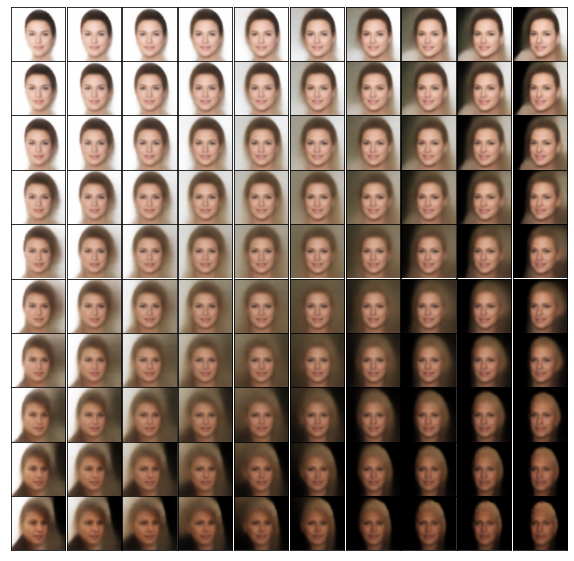

In [82]:
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i in range(100):
    ax = axes[i//10][i%10]
    
    ax.imshow(x_grid[i])
    ax.set_xticks([]);ax.set_yticks([])
plt.subplots_adjust(wspace=0, hspace=0)

## 2-2 : Visualize latent space of GAN
There's no simple way of selecting good axes for visualization in vanilla GAN.  
Thus, you can choose any orthonormal vectors in latent space.

In [83]:
### your answer ###
vector_1 = np.random.randn(gan_latent_dim) # take a random vector
vector_1 /= np.linalg.norm(vector_1) # normalize it
vector_2 = np.random.randn(gan_latent_dim) # take a random vector
vector_2 -= vector_2.dot(vector_1) * vector_1 # make it orthogonal to vector_1 with Gram–Schmidt process
vector_2 /= np.linalg.norm(vector_2) # normalize it
bases = np.concatenate([[vector_1], [vector_2]])

In [84]:
z1_grid = np.linspace(-5, 5, 10)[:, None] * bases[0][None, :]
z2_grid = np.linspace(-5, 5, 10)[:, None] * bases[1][None, :]

z_grid = z1_grid[None, :] + z2_grid[:, None]

In [85]:
x_grid = gan.decode(torch.tensor(z_grid, dtype=torch.float32).view(100, -1))

x_grid = denormalize(x_grid).detach().cpu().numpy()
x_grid = np.rollaxis(x_grid, 1, 4)

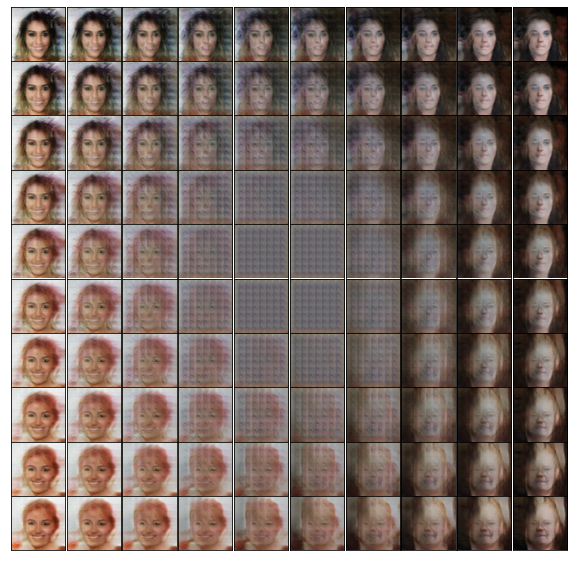

In [86]:
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
for i in range(100):
    ax = axes[i//10][i%10]
    
    ax.imshow(x_grid[i])
    ax.set_xticks([]);ax.set_yticks([])
plt.subplots_adjust(wspace=0, hspace=0)